# Support Vector Machines

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification or regression. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

### Regularization

The parameter $C$, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low $C$ makes the decision surface smooth (soft margin), while a high $C$ aims at classifying all training examples correctly (hard margin).

## Mathematical Formulation

### Support Vector Classifier

Given $x_i \in \Re^p$ training vectors, $i = 1, \dots, n$, in two classes, and a vector $y \in \{+1, -1\}^n$, SVC solves the following primal problem:

$$
 \begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\text{subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i\\
& \zeta_i \geq 0, i=1, \dots, n\end{split}\end{aligned}\end{align}
$$

Its dual is:

$$
 \begin{align}\begin{aligned}\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha\\\begin{split}
\text{subject to } & y^T \alpha = 0\\
& 0 \leq \alpha_i \leq C, i=1, \dots, n\end{split}\end{aligned}\end{align} 
$$

where $e$ is the vector of all ones, $C > 0$ is the upper bound, $Q$ is an $n$ by $n$ positive semidefinite matrix, $Q_{ij} = y_i y_j K(x_i, x_j)$, where $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.

The decision function is:

$$
\operatorname{sgn}(\sum_{i=1}^n y_i \alpha_i K(x_i, x) + b)
$$

where these parameters can be accessed through the members *dual_coef_* which holds the product $y_i \alpha_i$, *support_vectors_* which holds the support vectors, and *intercept_* which holds the independent term $b$.

In [3]:
from ml.svm import SVC
from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

#### 1. Linearly Separble Binary Classification

We have $n$ training points, where each input $x_i$ has $D$ attributes (i.e. is of dimensionality $D$) and is in one of two classes $y_{i}=+1$ or $-1$, i.e our training data is of the form:

$$
\{x_i,y_{i}\} \text{where i}=1, \dots, n, y_{i}\in\{+1,-1\} , x\in\Re^{D}
$$

Here we assume the data is linearly separable, meaning that we can draw a line on a graph of $x_{1}$ vs $x_{2}$ separating the two classes when $D=2$ and a hyperplane on graphs of $x_{1}, x_{2}$, $\dots$, $x_{D}$ for when $D>2.$

This hyperplane can be described by $\langle w, x \rangle +b=0$ where $w$ is normal to the hyperplane and $\displaystyle \frac{b}{\Vert w\Vert}$ is the perpendicular distance from the hyperplane to the origin. 

Support Vectors are the examples closest to the separating hyperplane and the aim of Support Vector Machines (SVM) is to orientate this hyperplane in such a way as to be as far as possible from the closest members of both classes.

<img src="img/svc-001.png" width=600/>

Referring to this figure, implementing a SVM boils down to selecting the variables $w$ and $b$ so that our training data can be described by:

$$
\begin{equation}
    \langle x_i, w \rangle +b\geq+1 \ \text{for} \ y_{i}=+1 \tag{1.1}
\end{equation}
$$
$$
\begin{equation}
    \langle x_i, w \rangle +b\leq-1 \ \text{for} \ y_{i}=-1 \tag{1.2}
\end{equation}
$$ 

These equations can be combined into:

$$
\begin{equation}
    y_{i}(\langle x_i, w \rangle +b)-1\geq 0 \ \forall_{i} \tag{1.3}
\end{equation}
$$ 

If we now just consider the points that lie closest to the separating hyperplane, i.e. the Support Vectors (shown in circles in the diagram), then the two planes $H_{1}$ and $H_{2}$ that these points lie on can be described by:

$$
\begin{equation}
    \langle x_i, w \rangle +b=+1 \ \text{for} \ H_{1} \tag{1.4}
\end{equation}
$$ 
$$
\begin{equation}
    \langle x_i, w \rangle +b=-1 \ \text{for} \ H_{2} \tag{1.5}
\end{equation}
$$ 

Referring to the previous figure, we define $d_{1}$ as being the distance from $H_{1}$ to the hyperplane and $d_{2}$ from $H_{2}$ to it. The hyperplane's equidistance from $H_{1}$ and $H_{2}$ means that $d_{1}=d_{2}-$ a quantity known as the SVM's margin. In order to orientate the hyperplane to be as far from the Support Vectors as possible, we need to maximize this margin.

Simple vector geometry shows that the margin is equal to $\displaystyle \frac{1}{\Vert w\Vert}$ and maximizing it subject to the constraint in (1.3) is equivalent to finding:

$$
\begin{equation}
    \displaystyle \min\Vert w\Vert \ \text{subject to} \ y_{i}(\langle x_i, w \rangle +b)-1\geq 0 \ \forall_{i}
\end{equation}
$$

Minimizing $\Vert w\Vert$ is equivalent to minimizing $\displaystyle \frac{1}{2}\Vert w\Vert^{2}$ and the use of this term makes it possible to perform Quadratic Programming (QP) optimization later on. We therefore need to find:

$$
\begin{equation}
    \displaystyle \min\frac{1}{2}\Vert w\Vert^{2} \ \text{subject to} \ y_{i}(\langle x_i, w \rangle +b)-1\geq 0 \ \forall_{i} \tag{1.6}
\end{equation}
$$

In order to cater for the constraints in this minimization, we need to allocate them Lagrange multipliers $\alpha$, where $\alpha_{i}\geq 0 \ \forall_{i}$:

$$
\begin{equation}
    L_{P}\displaystyle = \frac{1}{2}\Vert w\Vert^{2}-\alpha[y_{i}(\langle x_i, w \rangle +b)-1 \ \forall_{i}] \tag{1.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle = \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}[y_{i}(\langle x_i, w \rangle +b)-1] \tag{1.8}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle = \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}y_{i}(\langle x_i, w \rangle +b)+\sum_{i=1}^{n}\alpha_{i} \tag{1.9}
\end{equation}
$$

We wish to find the $w$ and $b$ which minimizes, and the $\alpha$ which maximizes $L_P$ (whilst keeping $\alpha_{i}\geq 0 \ \forall_{i}$). We can do this by differentiating $L_{P}$ with respect to $w$ and $b$ and setting the derivatives to zero:

$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_i x_i \tag{1.10}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial b}=0\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.11}
\end{equation}
$$

Substituting (1.10) and (1.11) into (1.9) gives a new formulation which, being dependent on $\alpha$, we need to maximize:

$$
\begin{equation}
    L_{D}\displaystyle = \sum_{i=1}^{n}\alpha_{i}-\frac{1}{2}\sum_{i,j}\alpha_{i}\alpha_{j}y_{i}y_{j} \langle x_i, x_j \rangle \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.12}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle = \sum_{i=1}^{n}\alpha_{i}-\frac{1}{2}\sum_{i,j}\alpha_{i}H_{ij}\alpha_{j} \ \text{where} \ H_{ij} = y_{i}y_{j} \langle x_{i}, x_{j} \rangle \tag{1.13}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle = \sum_{i=1}^{n}\alpha_{i}-\frac{1}{2}\alpha^{T}H\alpha \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.14}
\end{equation}
$$

This new formulation $L_{D}$ is referred to as the *Dual* form of the *Primary* $L_{P}$. It is worth noting that the Dual form requires only the dot product of each input vector $x_{i}$ to be calculated, this is important for the *Kernel Trick* described later.

Having moved from minimizing $L_{P}$ to maximizing $L_{D}$, we need to find:

$$
\begin{equation}
    \displaystyle \max_{\alpha}\displaystyle \sum_{i=1}^{n} \alpha_{i}-\frac{1}{2}\alpha^{T}H\alpha \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i},\displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.15}
\end{equation}
$$

This is a convex quadratic optimization problem, and we run a QP solver which will return $\alpha$ and from (1.10) will give us $w$. What remains is to calculate $b.$

Any data point satisfying (1.11) which is a Support Vector $x_{s}$ will have the form:

$$y_{s}(\langle x_{s}, w \rangle +b)=1$$

Substituting in (1.10):

$$y_{s}(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b)=1$$

Where $S$ denotes the set of indices of the Support Vectors. $S$ is determined by finding the indices $i$ where $\alpha_{i}>0$. Multiplying through by $y_{s}$ and then using $y_{s}^{2}=1$ from (1.1) and (1.2):

$$y_{s}^{2}(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b)=y_{s}$$
$$b=y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle$$

Instead of using an arbitrary Support Vector $x_{s}$, it is better to take an average over all of the Support Vectors in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}(y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle) \tag{1.16}
\end{equation}
$$

We now have the variables $w$ and $b$ that define our separating hyperplane's optimal orientation and hence our Support Vector Machine.

custom svc accuracy score is 1.0
custom svc found 3 support vectors from 150 examples
custom svc w is [-1.99546485  2.22638621]
custom svc b is -0.5243885862315343


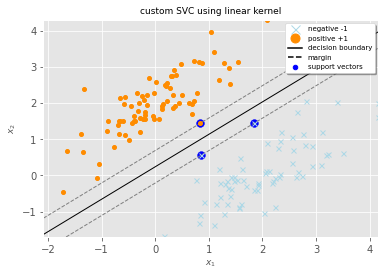

sklearn svc accuracy score is 1.0
sklearn svc found 3 support vectors from 150 examples
sklearn svc w is [[-1.99589882  2.22638184]]
sklearn svc b is [-0.52387894]


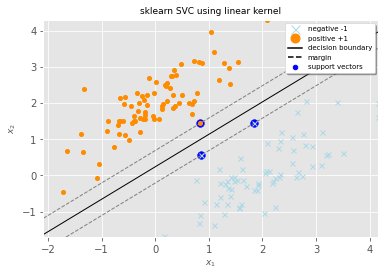

In [2]:
from utils import generate_linearly_separable_data

X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### 2. Not Fully Linearly Separble Binary Classification

In order to extend the SVM methodology to handle data that is not fully linearly separable, we relax the constraints for (1.1) and (1.2) slightly to allow for misclassified points. This is done by introducing a positive slack variable $\xi_{i}, i=1$, $\dots$ $n$ :

$$
\begin{equation}
    \langle x_i, w \rangle +b\geq+1-\xi_{i} \ \text{for} \ y_{i}=+1 \tag{2.1}
\end{equation}
$$
$$
\begin{equation}
    \langle x_i, w \rangle +b\leq-1+\xi_{i} \ \text{for} \ y_{i}=-1 \tag{2.2}
\end{equation}
$$ 

$$\text{where} \ \xi_{i}\geq 0 \ \forall_{i}$$

Which can be combined into:

$$
\begin{equation}
    y_{i}(\langle x_i, w \rangle +b)-1+\xi_{i}\geq 0 \ \forall_{i} \text{where} \ \xi_{i}\geq 0 \ \forall_{i} \tag{2.3}
\end{equation}
$$

<img src="img/svc-002.png" width=600/>

In this *soft margin* SVM, data points on the incorrect side of the margin boundary have a penalty that increases with the distance from it. As we are trying to reduce the number of misclassifications, a sensible way to adapt our objective function (1.6) from previously, is to find:


$$
\begin{equation}
    \displaystyle \min\frac{1}{2}\Vert w\Vert^{2}+C\sum_{i=1}^{n}\xi_{i} \ \text{subject to} \ y_{i}(\langle x_i, w \rangle +b)-1+\xi_{i} \geq 0 \ \forall_{i} \tag{2.4}
\end{equation}
$$

Where the parameter $C$ controls the trade-off between the slack variable penalty and the size of the margin. Reformulating as a Lagrangian, which as before we need to minimize with respect to $w$, $b$ and $\xi_{i}$ and maximize with respect to $\alpha$ (where $\alpha_{i} \geq 0, \mu_{i} \geq 0 \ \forall_{i}$):

$$
\begin{equation}
    L_{P}\displaystyle = \frac{1}{2}\Vert w\Vert^{2}+C\sum\xi_{i}-\sum\alpha_{i}[y_{i}(\langle{x}_{i}, w \rangle+b)-1+\xi_{i}]-\sum\mu_{i}\xi_{i} \tag{2.5}
\end{equation}
$$

Differentiating with respect to $w$, $b$ and $\xi_{i}$ and setting the derivatives to zero:

$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_{i}x_i \tag{2.6}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial b}=0\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{2.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial\xi_{i}}=0\Rightarrow C=\alpha_{i}+\mu_{i} \tag{2.8}
\end{equation}
$$

Substituting these in, $L_{D}$ has the same form as (1.14) before. However (2.8) together with $\mu_{i}\geq 0 \ \forall_{i}$, implies that $\alpha\leq C$. We therefore need to find:

$$
\begin{equation}
    \displaystyle \max_{\alpha}\displaystyle \sum_{i=1}^{n} \alpha_{i}-\frac{1}{2}\alpha^{T}H\alpha \ \text{subject to} \ 0<\alpha_{i}\leq C \ \forall_{i},\displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{2.9}
\end{equation}
$$

$b$ is then calculated in the same way as in (1.6) before, though in this instance the set of Support Vectors used to calculate $b$ is determined by finding the indices $i$ where $0<\alpha_{i}\leq C$.

custom svc accuracy score is 1.0
custom svc found 35 support vectors from 150 examples
custom svc w is [-0.80559124  0.95317259]
custom svc b is -0.015819903116364956


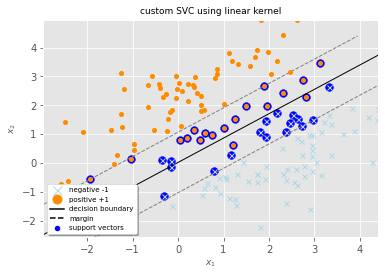

sklearn svc accuracy score is 1.0
sklearn svc found 35 support vectors from 150 examples
sklearn svc w is [[-0.80539088  0.95307814]]
sklearn svc b is [-0.01584279]


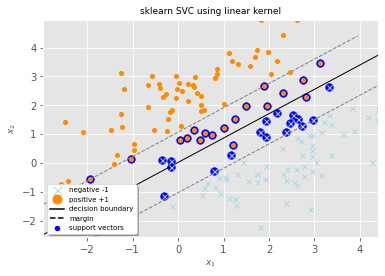

In [7]:
from utils import generate_linearly_separable_overlap_data

X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=0.1).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### 3. Nonlinear Support Vector Machines

When applying our SVM to linearly separable data we have started by creating a matrix $H$ from the dot product of our input variables:

$$
\begin{equation}
    H_{ij}=y_{i}y_{j}k(x_{i},\ x_{j})= \langle x_{i}, x_{j} \rangle=x_{i}^{T}x_{j} \tag{3.1}
\end{equation}
$$

$k(x_{i},x_{j})$ is an example of a family of functions called *kernel functions* where $k(x_{i},x_{j})=\langle x_{i}, x_{j} \rangle$ being known as a *linear* kernel. The set of kernel functions is composed of variants of (4.2) in that they are all based on calculating inner products of two vectors. This means that if the functions can be recast into a higher dimensionality space by some potentially non-linear feature mapping function $x\rightarrow \phi(x)$, only inner products of the mapped inputs in the feature space need be determined without us needing to explicitly calculate $\phi$.

The reason that this *Kernel Trick* is useful is that there are many classification/regression problems that are not linearly separable/regressable in the space of the inputs $x$, which might be in a higher dimensionality feature space given a suitable mapping $x \rightarrow \phi(x)$.

When training a SVM with one of the following nonlinear kernel functions, the *gamma* value can be easily automatically computed in such two heuristic ways:
- *auto* which uses 1 / (n_features * X.var()) as value of *gamma*;
- *scale* which uses 1 / n_features as value of *gamma*.

#### 3.1 Polynomial Kernel

The *polynomial* kernel is defined as: 

$$k(x_{i},x_{j})=(\gamma \langle x_i, x_j\rangle + r)^d$$ 

where $\gamma$ is specified by keyword *gamma*, $d$ by *degree* and $r$ by *coef0*.

custom svc accuracy score is 1.0
custom svc found 9 support vectors from 150 examples
custom svc b is -0.49135672988278756


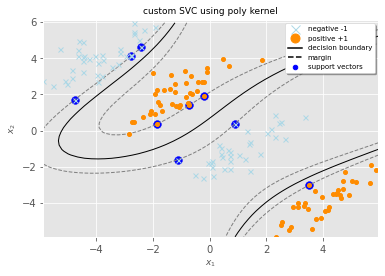

sklearn svc accuracy score is 1.0
sklearn svc found 9 support vectors from 150 examples
sklearn svc b is [-0.49270998]


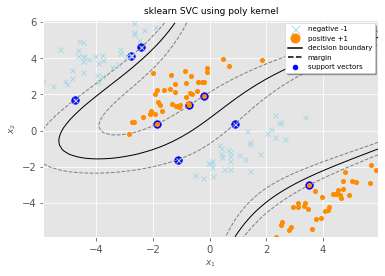

In [5]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='poly', degree=3., coef0=3, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='poly', degree=3., coef0=3., gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### 3.2 Radial Basis Function Kernel

The *rbf* kernel is defined as: 

$$k(x_{i},x_{j})=\exp(-\frac{\|x_i-x_j\|_2^2}{2\sigma^2})$$

or:

$$k(x_{i},x_{j})=\exp(-\gamma \|x_i-x_j\|_2^2)$$

where $\displaystyle \gamma=\frac{1}{2\sigma^2}$ is specified by keyword *gamma*.

custom svc accuracy score is 1.0
custom svc found 38 support vectors from 150 examples
custom svc b is 0.06848917778872975


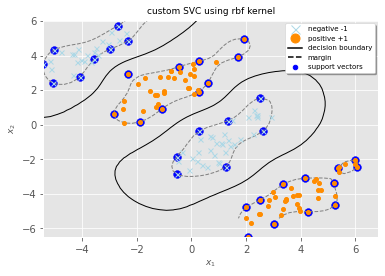

sklearn svc accuracy score is 1.0
sklearn svc found 38 support vectors from 150 examples
sklearn svc b is [0.06835751]


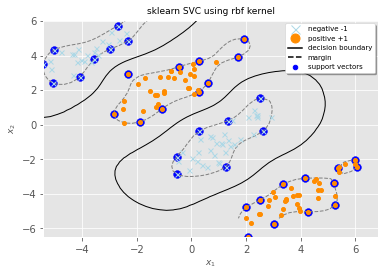

In [6]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### 3.3 Laplacian Kernel

The *laplacian* kernel is defined as: 

$$k(x_{i},x_{j})=\exp(-\frac{\|x_i-x_j\|_1}{2\sigma^2})$$

or:

$$k(x_{i},x_{j})=\exp(-\gamma \|x_i-x_j\|_1)$$

where $\displaystyle \gamma=\frac{1}{2\sigma^2}$ is specified by keyword *gamma*.

custom svc accuracy score is 1.0
custom svc found 66 support vectors from 150 examples
custom svc b is -0.023091720146354272


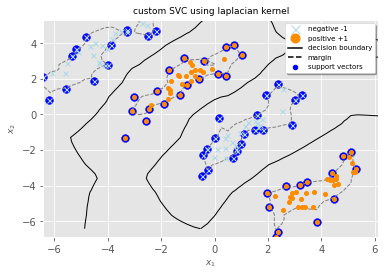

sklearn svc accuracy score is 1.0
sklearn svc found 66 support vectors from 150 examples
sklearn svc b is [-0.02293195]


In [19]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='laplacian', gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

from sklearn.metrics.pairwise import laplacian_kernel as laplacian

svc = SKLSVC(kernel=laplacian, gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### 3.4 Sigmoid Kernel

The *sigmoid* kernel is defined as:

$$k(x_{i},x_{j})=\tanh(\gamma \langle x_i,x_j\rangle + r)$$ 

where $\gamma$ is specified by keyword *gamma* and $r$ by *coef0*.

custom svc accuracy score is 0.1
custom svc found 138 support vectors from 150 examples
custom svc b is 13.812594255261462


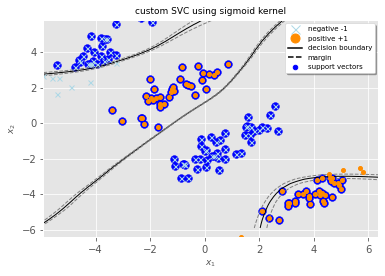

sklearn svc accuracy score is 0.1
sklearn svc found 138 support vectors from 150 examples
sklearn svc b is [13.81259441]


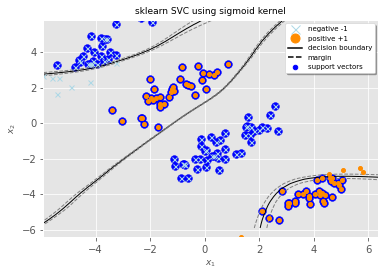

In [18]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='sigmoid', coef0=3, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='sigmoid', coef0=3., gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### Support Vector Regression

Given $x_i \in \Re^p$ training vectors, $i = 1, \dots, n$, and a vector $y \in \Re^n$, $\varepsilon$-SVR solves the following primal problem:

$$
 \begin{align}\begin{aligned}\min_ {w, b, \zeta^+, \zeta^-} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i^+ + \zeta_i^-)\\\begin{split}\text{subject to } & y_i - w^T \phi (x_i) - b \leq \varepsilon + \zeta_i^+\\
                      & w^T \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^-\\
                      & \zeta_i^+, \zeta_i^- \geq 0, i = 1, \dots, n\end{split}\end{aligned}\end{align} 
$$

Its dual is:

$$
 \begin{align}\begin{aligned}\min_{\alpha^+, \alpha^-} \frac{1}{2} (\alpha^+ - \alpha^-)^T Q (\alpha^+ - \alpha^-) + \varepsilon e^T (\alpha^+ + \alpha^-) - y^T (\alpha^+ - \alpha^-)\\\begin{split}
\text{subject to } & e^T (\alpha^+ - \alpha^-) = 0\\
& 0 \leq \alpha_i^+, \alpha_i^- \leq C, i=1, \dots, n\end{split}\end{aligned}\end{align}
$$

where $e$ is the vector of all ones, $C > 0$ is the upper bound, $Q$ is an $n$ by $n$ positive semidefinite matrix, $Q_{ij} = K(x_i, x_j)$, where $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.

The decision function is:

$$
\sum_{i=1}^n (\alpha_i^+ - \alpha_i^-) K(x_i, x) + b
$$

where these parameters can be accessed through the members *dual_coef_* which holds the difference $\alpha_i^+ - \alpha_i^-$, *support_vectors_* which holds the support vectors, and *intercept_* which holds the independent term $b$.

In [7]:
from ml.svm import SVR
from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

Instead of attempting to classify new unseen variables $x'$ into one of two categories $y'=\pm 1$, we now wish to predict a real-valued output for $y'$ so that our training data is of the form:

$$
\{x_i,y_i\} \text{where i}=1, \dots, n, y_{i}\in\Re, x\in\Re^{D}
$$

The regression SVM will use a more sophisticated penalty function than before, not allocating a penalty if the predicted value $y_{i}$ is less than a distance $\epsilon$ away from the actual value $t_{i}$, i.e. if $|t_{i}-y_{i}|<\epsilon$. 

<img src="img/svr-003.png" width=600/>

Referring to this figure, the region bound by $y_{i}\pm\epsilon \ \forall_{i}$ is called an $\epsilon$-insensitive tube. The other modification to the penalty function is that output variables which are outside the tube are given one of two slack variable penalties depending on whether they lie above $(\xi^{+})$ or below $(\xi^{-})$ the tube (where $\xi^{+}>0, \xi^{-}>0\forall_{i}$):

$$
\begin{equation}
    t_{i}\leq y_{i}+\epsilon+\xi^{+} \tag{3.1}
\end{equation}
$$
$$
\begin{equation}
    t_{i}\geq y_{i}-\epsilon-\xi^{-} \tag{3.2}
\end{equation}
$$

The error function for SVM regression can then be written as:

$$
\begin{equation}
    \displaystyle \frac{1}{2}\Vert w\Vert^{2} + C \sum_{i=1}^{n}(\xi_{i}^{+}+\xi_{i}^{-}) \tag{3.3}
\end{equation}
$$

This needs to be minimized subject to the constraints $\xi^{+}\geq 0, \xi^{-}\geq 0 \ \forall_{i}$ and (3.1) and (3.2). In order to do this we introduce Lagrange multipliers $\alpha_{i}^{+}\geq 0, \alpha_{i}^{-}\geq 0, \mu_{i}^{+}\geq 0\mu_{i}^{-}\geq 0 \ \forall_{i}$:

$$
\begin{equation}
    \displaystyle L_{P}=\frac{1}{2}\Vert w\Vert^{2}+C \sum_{i=1}^n(\xi_{i}^{+}+\xi_{i}^{-})-\sum_{i=1}^n(\mu_{i}^{+}\xi_{i}^{+}+\mu_{i}^{-}\xi_{i}^{-})-\sum_{i=1}^n\alpha_{i}^{+}(\epsilon+\xi_{i}^{+}+y_{i}-t_{i})-\sum_{i=1}^n\alpha_{i}^{-}(\epsilon+\xi_{i}^{-}-y_{i}+t_{i}) \tag{3.4}
\end{equation}
$$

Substituting for $y_{i}$, differentiating with respect to $w, b, \xi^{+}$ and $\xi^{-}$ and setting the derivatives to $0$:

$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})x_{i} \tag{3.5}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial b}=0\Rightarrow \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})=0 \tag{3.6}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial\xi_{i}^{+}}=0\Rightarrow C=\alpha_{i}^{+}+\mu_{i}^{+} \tag{3.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial\xi_{i}^{-}}=0\Rightarrow C=\alpha_{i}^{-}+\mu_{i}^{-} \tag{3.8}
\end{equation}
$$

Substituting (3.5) and (3.6) in, we now need to maximize $L_{D}$ with respect to $\alpha_{i}^{+}$ and $\alpha_{i}^{-}(\alpha_{i}^{+}\geq 0,\ \alpha_{i}^{-}\geq 0 \ \forall_{i})$ where:

$$
\begin{equation}
    L_{D}=\displaystyle \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})t_{i}-\epsilon\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})-\frac{1}{2}\sum_{i,j}(\alpha_{i}^{+}-\alpha_{i}^{-})(\alpha_{j}^{+}-\alpha_{j}^{-})\langle x_i, x_j \rangle \tag{3.9}
\end{equation}
$$

Using $\mu_{i}^{+}\geq 0$ and $\mu_{i}^{-}\geq 0$ together with (3.7) and (3.8) means that $\alpha_{i}^{+}\leq C$ and $\alpha_{i}^{-}\leq C$. We therefore need to find:

$$
\begin{equation}
    \max_{\alpha^+,\alpha^-} \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})t_{i}-\epsilon\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})-\frac{1}{2}\sum_{i,j}(\alpha_{i}^{+}-\alpha_{i}^{-})(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_i, x_j \rangle \tag{3.10}
\end{equation}
$$

such that $0\leq\alpha_{i}^{+}\leq C, 0\leq\alpha_{i}^{-}\leq C$ and $\displaystyle \sum_{i=1}^{n} (\alpha_{i}^{+}-\alpha_{i}^{-})=0 \ \forall_{i}$.

Substituting (3.6) into (3.1), new predictions $y'$ can be found using:

$$
\begin{equation}
    y'=\displaystyle \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_{i}, x' \rangle+b \tag{3.11}
\end{equation}
$$

A set $S$ of Support Vectors $x_{s}$ can be created by finding the indices $i$ where $0<\alpha<C$ and $\xi_{i}^{+}=0$ (or $\xi_{i}^{-}=0$).

This gives us:

$$
\begin{equation}
    b=t_{s}-\displaystyle \epsilon-\sum_{m\in S}(\alpha_m^+ -\alpha_m^-) \langle x_{m}, x_{s} \rangle \tag{3.12}
\end{equation}
$$

As before it is better to average over all the indices $i$ in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}t_{s}-\epsilon-\sum_{m\in=S}^{n}(\alpha_{m}^{+}-\alpha_{m}^{-})\langle x_{m}, x_{s} \rangle \tag{3.13}
\end{equation}
$$

custom svr r2 score is 0.9207213133967264
custom svr found 18 support vectors from 75 examples
custom svr b is 0.08114944031556193


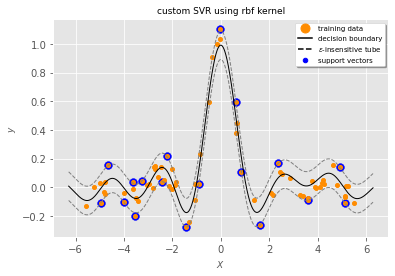

sklearn svr r2 score is 0.920435954731986
sklearn svr found 18 support vectors from 75 examples
sklearn svr b is [0.0808448]


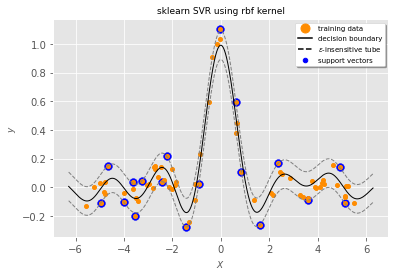

In [8]:
from utils import generate_non_linearly_regression_data

X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = SVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svr r2 score is {svr.score(X_test, y_test)}')
print(f'custom svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'custom svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)

svr = SKLSVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)

## Solve the QP Optimization Problem

Unlike other machine learning models, such as neural networks, the complexity of a SVM depends by the number of training examples rather than by the number of features. This is due to the core of a SVM which is essentially a quadratic programming problem (QP). 

To solve this kind of prolem we can use a general purpose quadratic programming solver based on various known optimization methods such as the projected greadient method, the active set method, the interior point method or the frank wolfe method.